# Overview and references 

You will download some sequences, import them into this notebook, analyze them, 
and plot the results. You should be able to complete this task using the lab slides as a reference, 
along with the resources listed below.

Please be sure to follow the standard submission workflow (checklist at end of notebook).


## References

Matplotlib 

1. https://matplotlib.org/users/pyplot_tutorial.html 
2. https://matplotlib.org/examples/statistics/boxplot_demo.html
3. https://matplotlib.org/examples/statistics/histogram_demo_features.html

BioPython

1. https://biopython.org/wiki/SeqIO 
2. https://biopython.org/wiki/Phylo 
3. https://biopython.org/DIST/docs/api/Bio.Align.MultipleSeqAlignment-class.html


# Package installation

First, let's install the packages we need for the lab. Recall, the `!` before a command runs the command in the terminal.

In [1]:
!conda config --add channels bioconda
!conda install -y biopython muscle fasttree 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - biopython
    - fasttree
    - muscle


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    biopython-1.79             |   py39h3811e60_0         2.6 MB  conda-forge
    fasttree-2.1.10            |       h779adbc_5         338 KB  bioconda
    libblas-3.9.0              |12_linux64_openblas          12 KB  conda-forge
    libcblas-3.9.0             |12_linux64_openblas          12 KB  conda-forge
    libgfortran-ng-11.2.0      |      h69a702a_11          19 KB  conda-forge
    libgfortran5-11.2.0        |      h5c6108e_11         1.7 MB  conda-forge
    liblapack-3.9.0            |12_linux64_openblas          12 KB  conda-forge
    libopenblas-0.3.18         |pthreads_h8fe5266_0         9.6 MB  conda-forge
    muscle-3.8.1551            |       h7d875b9_6         262 KB  biocond

# Background

Your PI has given you a set of DNA sequences and told you they are related. It’s not clear 
whether they are from the same taxon (paralogs), different taxa (orthologs), or perhaps a 
combination of the two. Perhaps they have some, but not all, domains in common (partial 
homology). What are some ways we can analyze them and figure out what their relationship is? 
What are some properties of DNA sequences, and how can we compare them to each other? 

In this lab, we will use the file `seqs.fa` that is contained in your cloned repository.

# 1. Generating a phylogenetic tree

Sequence alignment is the bread-and-butter of comparative genomics. When two sequences 
are aligned, we assume that each column corresponds to the same position in some ancestral 
sequence. Any indels or point mutations that occurred over evolutionary time then become 
apparent. Columns where the sequence has not changed show us which positions are 
conserved. Columns with differences show us where and how sequences have evolved since 
the most recent common ancestor.

We will cover this in greater detail later in the semester, but for now, it’s safe to consider a 
sequence aligner as a “black box.” In its simplest form, two unaligned sequences go in, and two 
aligned sequences come out. All the aligner really does is insert gaps (dashes, “-“) such that 
some arbitrary scoring function is maximized. Consider the following example:

```
Seq1 ATGATTAAG 
     ||     | 
Seq2 ATTGGCTAAG 
```

The sequences, with no gaps and beginning at the first column, match at only three positions. 
By eye, it looks like those two TAAG blocks at the end ought to match up, right? Recall that 
we’re trying to infer which parts of the sequence were present in the common ancestor of both 
Seq1 and Seq2, so we can infer which parts of the sequence have changed.

```
Seq1 AT-GATTAAG 
     || |  |||| 
Seq2 ATTGGCTAAG
```

By inserting a gap in Seq1, we now have seven matching positions. We can now infer that there 
was an indel in column 3 (i.e., a T was either inserted in Seq2 or deleted from Seq1—note that 
we can’t distinguish between these two possibilities without more data). It also looks like there 
may have been two transitions (i.e., A<-->G or C<-->T) in columns 5 and 6—note that we don’t 
know the directionality of these changes, again, without more data. 


What if we have many sequences, rather than just two? Can we align those to each other? Yes, 
of course! The result is called a multiple sequence alignment (MSA). When presented with a 
bunch of related sequences to analyze, generating an MSA is a great place to start. 


There’s a fantastic tool available to perform this very task: MUSCLE. Written by Bob Edgar, it 
has been cited over 22,000 times. If you’re ever wondering how to get your citation count up, 
writing some simple tool that everyone will use is definitely the way to go.

Now let's run muscle.

In [2]:
!muscle -in seqs.fa -out seqs.aligned.fa


MUSCLE v3.8.1551 by Robert C. Edgar

http://www.drive5.com/muscle
This software is donated to the public domain.
Please cite: Edgar, R.C. Nucleic Acids Res 32(5), 1792-97.

seqs 48 seqs, lengths min 2187, max 2217, avg 2209
00:00:00     16 MB(1%)  Iter   1  100.00%  K-mer dist pass 1
00:00:00     16 MB(1%)  Iter   1  100.00%  K-mer dist pass 2
00:00:06     88 MB(5%)  Iter   1  100.00%  Align node       
00:00:06     88 MB(5%)  Iter   1  100.00%  Root alignment
00:00:09     88 MB(5%)  Iter   2  100.00%  Refine tree   
00:00:09     88 MB(5%)  Iter   2  100.00%  Root alignment
00:00:09     88 MB(5%)  Iter   2  100.00%  Root alignment
00:00:21     88 MB(5%)  Iter   3  100.00%  Refine biparts
00:00:34     88 MB(5%)  Iter   4  100.00%  Refine biparts
00:00:34     88 MB(5%)  Iter   5  100.00%  Refine biparts
00:00:34     88 MB(5%)  Iter   5  100.00%  Refine biparts


## 1.1

Examine the contents of the input and output of this command. What do 
you notice?

In [27]:
from Bio import SeqIO

#for seq_rec in SeqIO.parse("seqs.aligned.fa", "fasta"):
#    print(seq_rec.name)
#    print(seq_rec.seq)

## 1.1 Answer

The sequences appear to be fairly closely related. The original sequences are approximately 2200 characters in length, and in the multiple alignment there are most frequently around 10-30 insertions (only ~1% of the length).

We will go into more detail on generating trees later in the semester, but for now, you can use 
Morgan Price’s excellent tool FastTree to take your multiple alignment and turn it into a 
Newick-formatted tree. 

In [4]:
!fasttree -nt < seqs.aligned.fa > tree.nwk

FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: standard input
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
Initial topology in 0.08 seconds
Refining topology: 22 rounds ME-NNIs, 2 rounds ME-SPRs, 11 rounds ML-NNIs
Total branch-length 0.954 after 0.88 sec2, 1 of 46 splits   
ML-NNI round 1: LogLk = -15605.734 NNIs 8 max delta 16.63 Time 1.26
Switched to using 20 rate categories (CAT approximation)1 of 20   
Rate categories were divided by 0.741 so that average rate = 1.0
CAT-based log-likelihoods may not be comparable across runs
Use -gamma for approximate but comparable Gamma(20) log-likelihoods
ML-NNI round 2: LogLk = -14232.579 NNIs 0 max delta 0.00 Time 1.50
Turning off heuristics for final round of ML NNIs (converged)
ML-NNI round 3: LogLk = -14232.478 NNIs 0 max de

## 1.2

Visualize your tree using Bio.Phylo. You will notice that there is some clustered structure in the tree.

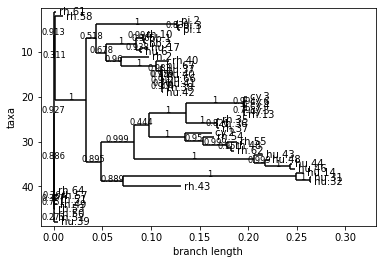

In [5]:
# Imports
from Bio import Phylo # Imports Bio.Phylo
from io import StringIO # Imports StringIO for reading strings
from matplotlib import pyplot as plt
%matplotlib inline

tree = Phylo.read("tree.nwk", "newick")
Phylo.draw(tree)

For the rest of the assignment, you will use the following clusters to analyze the dataset.

In [6]:
cluster1 = ["rh.40", "hu.67", "hu.40", "hu.66", "hu.37", "hu.42", "pi.1", "pi.2", "pi.3", "rh.10", "bb.1", "bb.2", "hu.17", "hu.6", "rh.2"]
cluster2 = ["cy.3", "cy.6", "cy.4", "cy.5", "rh.13", "rh.35", "rh.36", "rh.37", "cy.2", "rh.54", "rh.55", "rh.48", "rh.62", "hu.43", "hu.48", "hu.44", "hu.46", "hu.14", "hu.31", "hu.32", "rh.43"]
cluster3 = ["rh.64", "rh.57", "rh.51", "rh.49", "rh.53", "rh.50", "rh.52", "hu.39"]

# 2. Identifying sequences by BLAST

Comparing sequences in your dataset to themselves can be highly informative. There’s also lots 
gain by comparing them to one of many large databases currently available. In this lab, we 
haven’t been told where these sequences are from—are they even from a genome? Are they 
coding (i.e., do they encode a protein) or non-coding? 
 
We could pop our `seqs.fa` file into BLAST and see what comes up, but that’s going to take a 
while. We have a lot of sequences, and going through the results for all of them is slow. Using 
the provided clusters, pick a single 
representative specimen from each. Now, load the sequences here using 
Bio.SeqIO and print the sequence of each chosen specimen to the screen. Point your web 
browser at https://blast.ncbi.nlm.nih.gov/Blast.cgi and BLAST each representative against 
`nr/nt` using default parameters. 




In [7]:
clusters = [cluster1, cluster2, cluster3]
cluster_reps = []


record_dict = SeqIO.index("seqs.fa", "fasta")
for cluster in clusters:
    cluster_rep = cluster[0]
    print(record_dict[cluster_rep].name)
    print(record_dict[cluster_rep].seq)
    print()

rh.40
atggctgctgacggttatcttccagattggctcgaggacaacctctctgagggcattcgcgagtggtgggacctgaaacctggagcccccaagcccaaggccaaccagcagaagcaggacgacggccggggtctggtgcttcctggctacaagtacctcggacccttcaacggactcgacaagggggagcccgtcaacgcggcggacgcagcggccctcgagcacgacaaggcctacgaccagcagctcaaagcgggtgacaatccgtacctgcggtataaccacgccgacgccgagtttcaggagcgtctgcaagaagatacgtcttttgggggcaacctcgggcgagcagtcttccaggccaagaagcgggttctcgaacctctcggtctggttgaggaagctgctaagacggctcctggaaagaagagaccggtagaaccgtcacctcagcgttcccccgactcctccacgggcatcggcaagaaaggccagcagcccgctaaaaagagactgaactttggtcagactggcgactcagagtcagtccccgaccctcaaccaatcggagaaccaccagcaggcccctctggtctgggatctggtacaatggctgcaggcggtggcgctccaatggcagacaataacgaaggcgccgacggagtgggtagttcctcaggaaattggcattgcgattccacatggctgggcgacagagtcatcaccaccagcacccgaacctgggccctgcccacctacaacaaccacctctacaagcaaatatccaatgggacatcgggaggaagcaccaacgacaacacctacttcggctacagcaccccctgggggtattttgacttcaacagattccactgccacttctcaccacgtgactggcagcgactcatcaacaacaactggggattccggccaaaaagactcagcttcaagctcttcaacatccaggtcaaggaggtcacgcaggatgaaggca

## 2.1

What are some of the most common matches for each cluster? 

### 2.1 answer

Each of the representative sequences was a perfect match to a sequence in the database. All of them are associated with the capsid protein (VP1) of an adeno-associated virus.

## 2.2

Do they all match the same gene?

### 2.2 answer

All representative samples are associated a gene encoding the capsid protein (VP1) of an adeno-associated virus.

## 2.3

Are there any that definitely do not match the 
others?

### 2.3 answer

The main mismatch is that one of the clusters seems to be in a non-human strain of the virus. This set of sequences seems to be from various different AAVs, tracking the virus's evolution over time by examining a specific gene. 

## 2.4

Why might we not trust the annotations for sequences that come up in our BLAST? 

### 2.4 answer

In general, we might not trust a BLAST annotation given that it is a heuristic algorithm and that it turns up multiple matches for a given sequence. In this case, however, this mistrust is somewhat mitigated by the fact that we have a 100% match for each of the representative samples, and that the matches generally are related to the same gene.

# 3. Calculating sequences statistics for each cluster

Now that you have your sequences broken out into clusters and a reasonable annotation for 
each cluster, let’s calculate some simple statistics. First, let us identify any regions that are skewed toward GC 
or AT, which might be useful for your final project later in the semester.

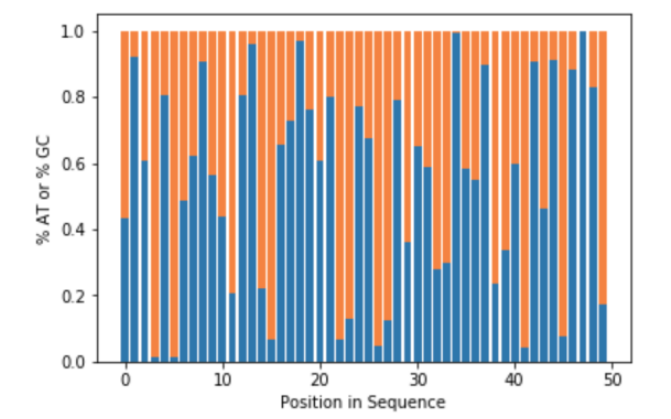


## 3.1
For each position in the MSA of each cluster, 
calculate the fraction of A or T, and the fraction of 
G or C. Note that the sum of each quantity will sum 
to 1.0. Just like in previous labs, you will organize the data in a pandas DataFrame and use the DataFrame to make the bar plot.

As a first step in this process, complete the implementations of `cluster_alignment` and `build_cluster_dataframe`.
In this part of the assignment you will use Bio.Align's `MultipleSequenceAlignment` object that can be sliced by column.

See: https://biopython.org/DIST/docs/api/Bio.Align.MultipleSeqAlignment-class.html

In [8]:
from typing import List
from Bio import AlignIO
from Bio.Align import MultipleSeqAlignment

alignment = AlignIO.read("seqs.aligned.fa", "fasta")

def cluster_alignment(alignment: MultipleSeqAlignment, cluster: List[str]) -> MultipleSeqAlignment:
    """Creates a MultipleSequenceAlignment object for one cluster."""
    msa = MultipleSeqAlignment([])
    for record in alignment:
        if record.name in cluster:
            msa.append(record)
    return msa

cl1_alignment = cluster_alignment(alignment, cluster1)
cl2_alignment = cluster_alignment(alignment, cluster2)
cl3_alignment = cluster_alignment(alignment, cluster3)

In [9]:
import pandas as pd
import numpy as np

def build_cluster_dataframe(msa: MultipleSeqAlignment) -> pd.DataFrame:
    """
    Build the cluster-specific dataframe from the MSA.
    
    
    Returns
    -------
    A pandas DF with two columns ['%GT', '%AT'].
    Each row sums to 1.
    """
    
    gc_freq = []
    at_freq = []
    for i in range(0, msa.get_alignment_length()):
        alignment_column = str(msa[:,i])
        gc_freq.append(alignment_column.count("G") + alignment_column.count("C"))
        at_freq.append(alignment_column.count("A") + alignment_column.count("T"))
        
    gc_freq = np.array(gc_freq, dtype=float)
    at_freq = np.array(at_freq, dtype=float)
    
    gc_proportion = np.divide(gc_freq, gc_freq+at_freq)
    at_proportion = np.divide(at_freq, gc_freq+at_freq)
                                           
    df = pd.DataFrame()
    df["GC Proportion"] = gc_proportion
    df["AT Proportion"] = at_proportion
    
    return df

cl1_dataframe = build_cluster_dataframe(cl1_alignment)
cl2_dataframe = build_cluster_dataframe(cl2_alignment)
cl3_dataframe = build_cluster_dataframe(cl3_alignment)

/tmp/ipykernel_23/2316678668.py:25: RuntimeWarning: invalid value encountered in true_divide
  gc_proportion = np.divide(gc_freq, gc_freq+at_freq)
/tmp/ipykernel_23/2316678668.py:26: RuntimeWarning: invalid value encountered in true_divide
  at_proportion = np.divide(at_freq, gc_freq+at_freq)


## 3.2

Using the cluster specific dataframes you built, make the specified bar plots (three total plots total), using only the first 50 positions.

<AxesSubplot:title={'center':'Cluster 1: GC/AT Proportion'}, xlabel='Position in Sequence', ylabel='% AT or % GC'>

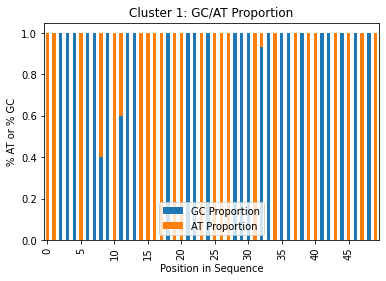

In [10]:
cl1_dataframe[:50].plot.bar(stacked=True, title="Cluster 1: GC/AT Proportion", xticks=range(0,50,5), xlabel="Position in Sequence", ylabel="% AT or % GC")

<AxesSubplot:title={'center':'Cluster 2: GC/AT Proportion'}, xlabel='Position in Sequence', ylabel='% AT or % GC'>

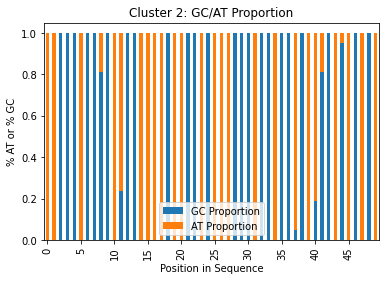

In [11]:
cl2_dataframe[:50].plot.bar(stacked=True, title="Cluster 2: GC/AT Proportion", xticks=range(0,50,5), xlabel="Position in Sequence", ylabel="% AT or % GC")

<AxesSubplot:title={'center':'Cluster 3: GC/AT Proportion'}, xlabel='Position in Sequence', ylabel='% AT or % GC'>

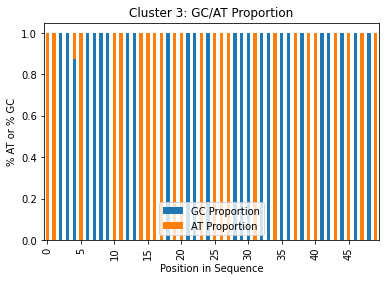

In [12]:
cl3_dataframe[:50].plot.bar(stacked=True, title="Cluster 3: GC/AT Proportion", xticks=range(0,50,5), xlabel="Position in Sequence", ylabel="% AT or % GC")

## 3.3

Next, find the length of each sequence in each 
cluster. Generate a box plot that shows the 
distribution of sequence lengths within each 
cluster. It will look something like this: 

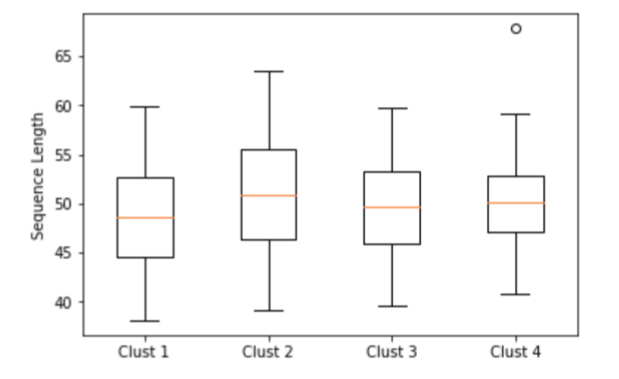

Consider using `SeqIO.to_dict` as part of your solution.

<AxesSubplot:xlabel='Cluster', ylabel='Sequence Length'>

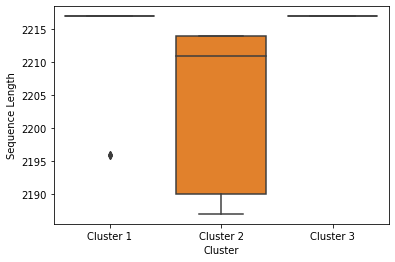

In [26]:
import seaborn as sns

record_dict = SeqIO.index("seqs.fa", "fasta")
cluster_lengths = []

cluster_num = 1
for cluster in clusters:
    cluster_name = "Cluster " + str(cluster_num)
    for seq_name in cluster:
        seq = record_dict[seq_name].seq
        length = len(seq)
        cluster_lengths.append([cluster_name, length])
    cluster_num += 1
  
cluster_length_frame = pd.DataFrame(columns=["Cluster", "Sequence Length"], data=cluster_lengths)
sns.boxplot(data=cluster_length_frame, x="Cluster", y="Sequence Length")

# Submission checklist

1. Commit and push this notebook,
1. No need to add/commit/push any other files
1. Submit repo link on GitHub
